In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
# Read a pandas DataFrame
#df = pd.read_csv("C:\jintu\Formated data_resampled 1H ID1\six months.csv")
df = pd.read_csv("MY3_May_2023_KNN_Imputed.csv")

df

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:30:00,2.200000e+01,8.871990,0.000000,398.496241,3.636364,26.00000,71.000000,45.666667,55.000000
1,2022-07-03 20:45:00,6.700000e+01,3.802281,0.000000,229.323308,0.000000,25.00000,62.000000,44.666667,53.333333
2,2022-07-03 21:00:00,1.120000e+02,12.674271,0.000000,184.210526,0.000000,25.00000,60.000000,43.666667,52.750000
3,2022-07-03 21:15:00,1.560000e+02,16.476553,0.000000,165.413534,0.000000,24.00000,59.666667,43.333333,52.666667
4,2022-07-03 21:30:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.25921,61.186420,18.749892,20.904609
...,...,...,...,...,...,...,...,...,...,...
28042,2023-04-21 23:00:00,1.061851e+06,397.944200,225.108225,700.960219,489.898990,29.00000,69.000000,27.666667,29.000000
28043,2023-04-21 23:15:00,1.061896e+06,392.070485,225.974026,707.818930,492.424242,29.00000,69.000000,31.666667,36.000000
28044,2023-04-21 23:30:00,1.061941e+06,393.538913,225.974026,716.049383,493.686869,29.00000,70.000000,33.333333,39.333333
28045,2023-04-21 23:45:00,1.061986e+06,392.070485,225.108225,727.023320,488.636364,29.00000,70.000000,35.333333,42.666667


In [3]:
df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2.head()

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:00:00,44.500000,6.337136,0.000000,313.909774,1.818182,25.500000,66.500000,45.166667,54.166667
1,2022-07-03 21:00:00,265430.890775,168.057839,95.408180,484.620809,185.998779,25.879605,60.509877,31.124946,36.806471
2,2022-07-03 22:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
3,2022-07-03 23:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
4,2022-07-04 00:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609


In [4]:
df = df2

target1 = 'field1'
test_l = 168
train_l = len(df) - test_l
date = 'Datetime'
# Create a TimeSeries, specifying the time and value columns
series1 = TimeSeries.from_dataframe(df, date, target1)

# Set aside the last 24 hours as a validation series
train1, val1 = series1[:train_l], series1[train_l:]

target2 = 'field2'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series2 = TimeSeries.from_dataframe(df, date, target2)

# Set aside the last 24 hours as a validation series
train2, val2 = series2[:train_l], series2[train_l:]

target3 = 'field3'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series3 = TimeSeries.from_dataframe(df, date, target3)

# Set aside the last 24 hours as a validation series
train3, val3 = series3[:train_l], series3[train_l:]

target4 = 'field4'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series4 = TimeSeries.from_dataframe(df, date, target4)

# Set aside the last 24 hours as a validation series
train4, val4 = series4[:train_l], series4[train_l:]

target7 = 'field7'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series7 = TimeSeries.from_dataframe(df, date, target7)

# Set aside the last 24 hours as a validation series
train7, val7 = series7[:train_l], series7[train_l:]

target8 = 'field8'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series8 = TimeSeries.from_dataframe(df, date, target8)

# Set aside the last 24 hours as a validation series
train8, val8 = series8[:train_l], series8[train_l:]

# CROSTON MODEL

In [5]:
from darts.models import Croston
from darts.metrics import mape

# Train the CROSTON model on the training series
croston_model1 = Croston()
croston_model1.fit(train1)

# Test the model on the validation series
croston_forecast1 = croston_model1.predict(len(val1))

# Compute the Mean Absolute Percentage Error (MAPE)
mape_score1 = mape(val1, croston_forecast1)

# Print the MAPE score
print("MAPE Score (field1):", mape_score1)

# Repeat the same steps for other fields
croston_model2 = Croston()
croston_model2.fit(train2)
croston_forecast2 = croston_model2.predict(len(val2))
mape_score2 = mape(val2, croston_forecast2)
print("MAPE Score (field2):", mape_score2)

croston_model3 = Croston()
croston_model3.fit(train3)
croston_forecast3 = croston_model3.predict(len(val3))
mape_score3 = mape(val3, croston_forecast3)
print("MAPE Score (field3):", mape_score3)

croston_model4 = Croston()
croston_model4.fit(train4)
croston_forecast4 = croston_model4.predict(len(val4))
mape_score4 = mape(val4, croston_forecast4)
print("MAPE Score (field4):", mape_score4)

croston_model7 = Croston()
croston_model7.fit(train7)
croston_forecast7 = croston_model7.predict(len(val7))
mape_score7 = mape(val7, croston_forecast7)
print("MAPE Score (field7):", mape_score7)

croston_model8 = Croston()
croston_model8.fit(train8)
croston_forecast8 = croston_model8.predict(len(val8))
mape_score8 = mape(val8, croston_forecast8)
print("MAPE Score (field8):", mape_score8)


MAPE Score (field1): 22.93806170271774
MAPE Score (field2): 24.523838570489787
MAPE Score (field3): 8.299327504456318
MAPE Score (field4): 30.87867702276853
MAPE Score (field7): 33.2731949385189
MAPE Score (field8): 39.88445548271994


In [6]:
import pandas as pd
from darts.metrics import rmse, mae

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Field', 'RMSE', 'MAE'])

# Function to calculate RMSE and MAE and append the results to the DataFrame
def calculate_metrics(field_name, model, validation_series):
    forecast = model.predict(len(validation_series))
    rmse_score = rmse(validation_series, forecast)
    mae_score = mae(validation_series, forecast)
    results_df.loc[len(results_df)] = [field_name, rmse_score, mae_score]

# Calculate metrics for each field
calculate_metrics('field1', croston_model1, val1)
calculate_metrics('field2', croston_model2, val2)
calculate_metrics('field3', croston_model3, val3)
calculate_metrics('field4', croston_model4, val4)
calculate_metrics('field7', croston_model7, val7)
calculate_metrics('field8', croston_model8, val8)

# Save the results to a CSV file
results_df.to_csv('croston_error.csv', index=False)


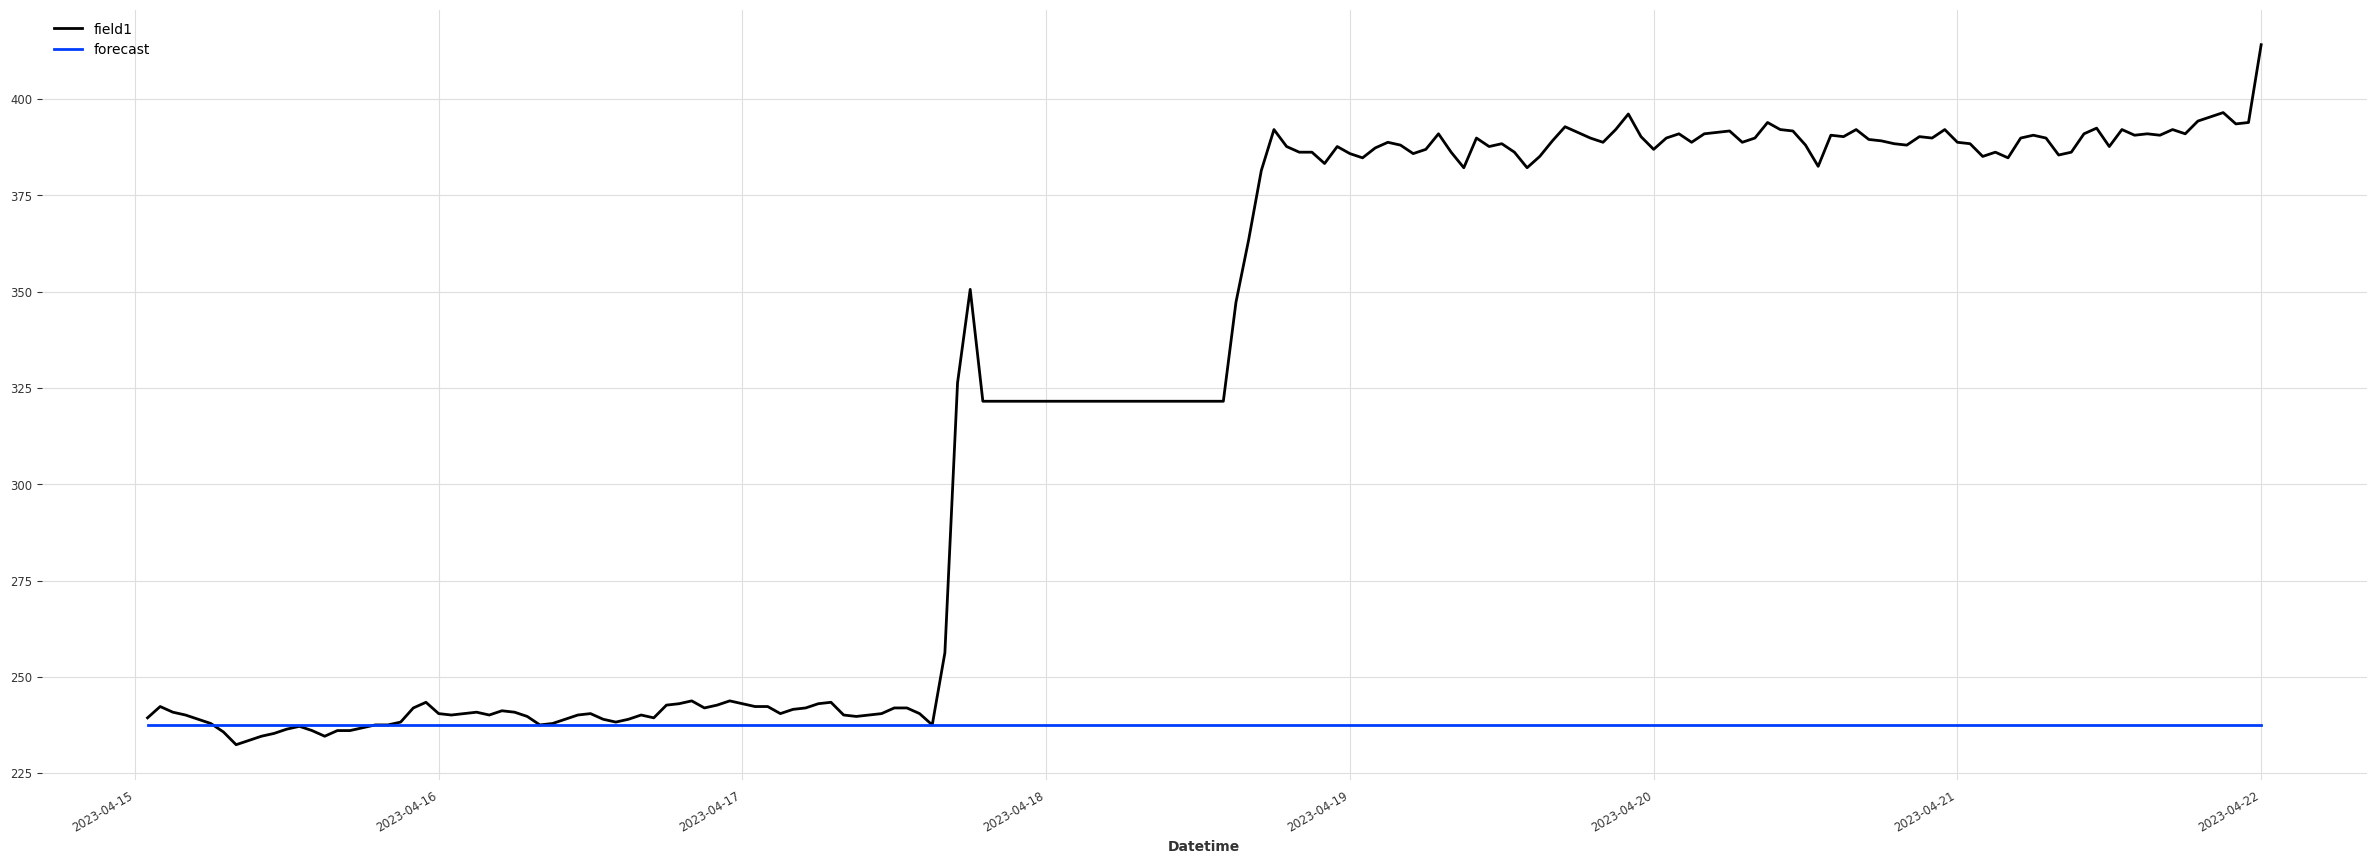

In [7]:
#mean_absolute_error(val,pred)
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
val1.plot()
croston_forecast1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

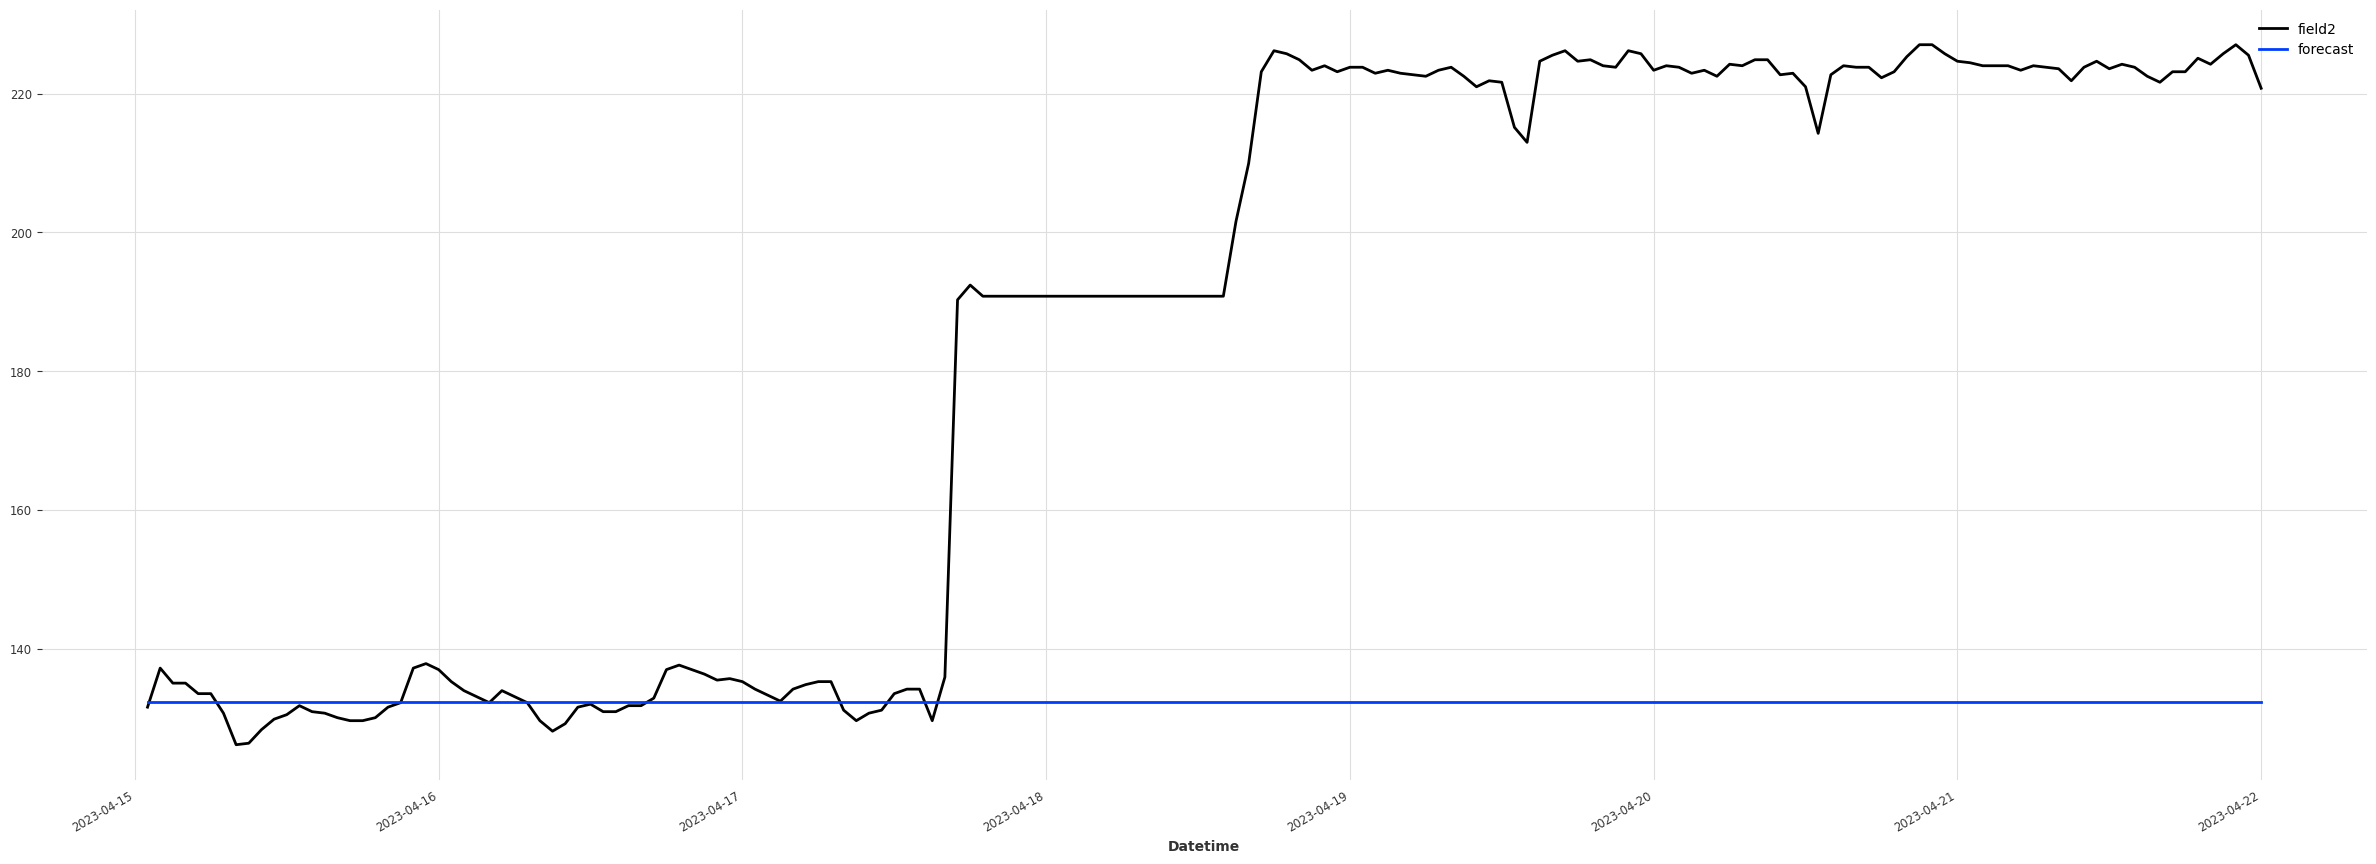

In [8]:
#mean_absolute_error(val,pred)
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
val2.plot()
croston_forecast2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

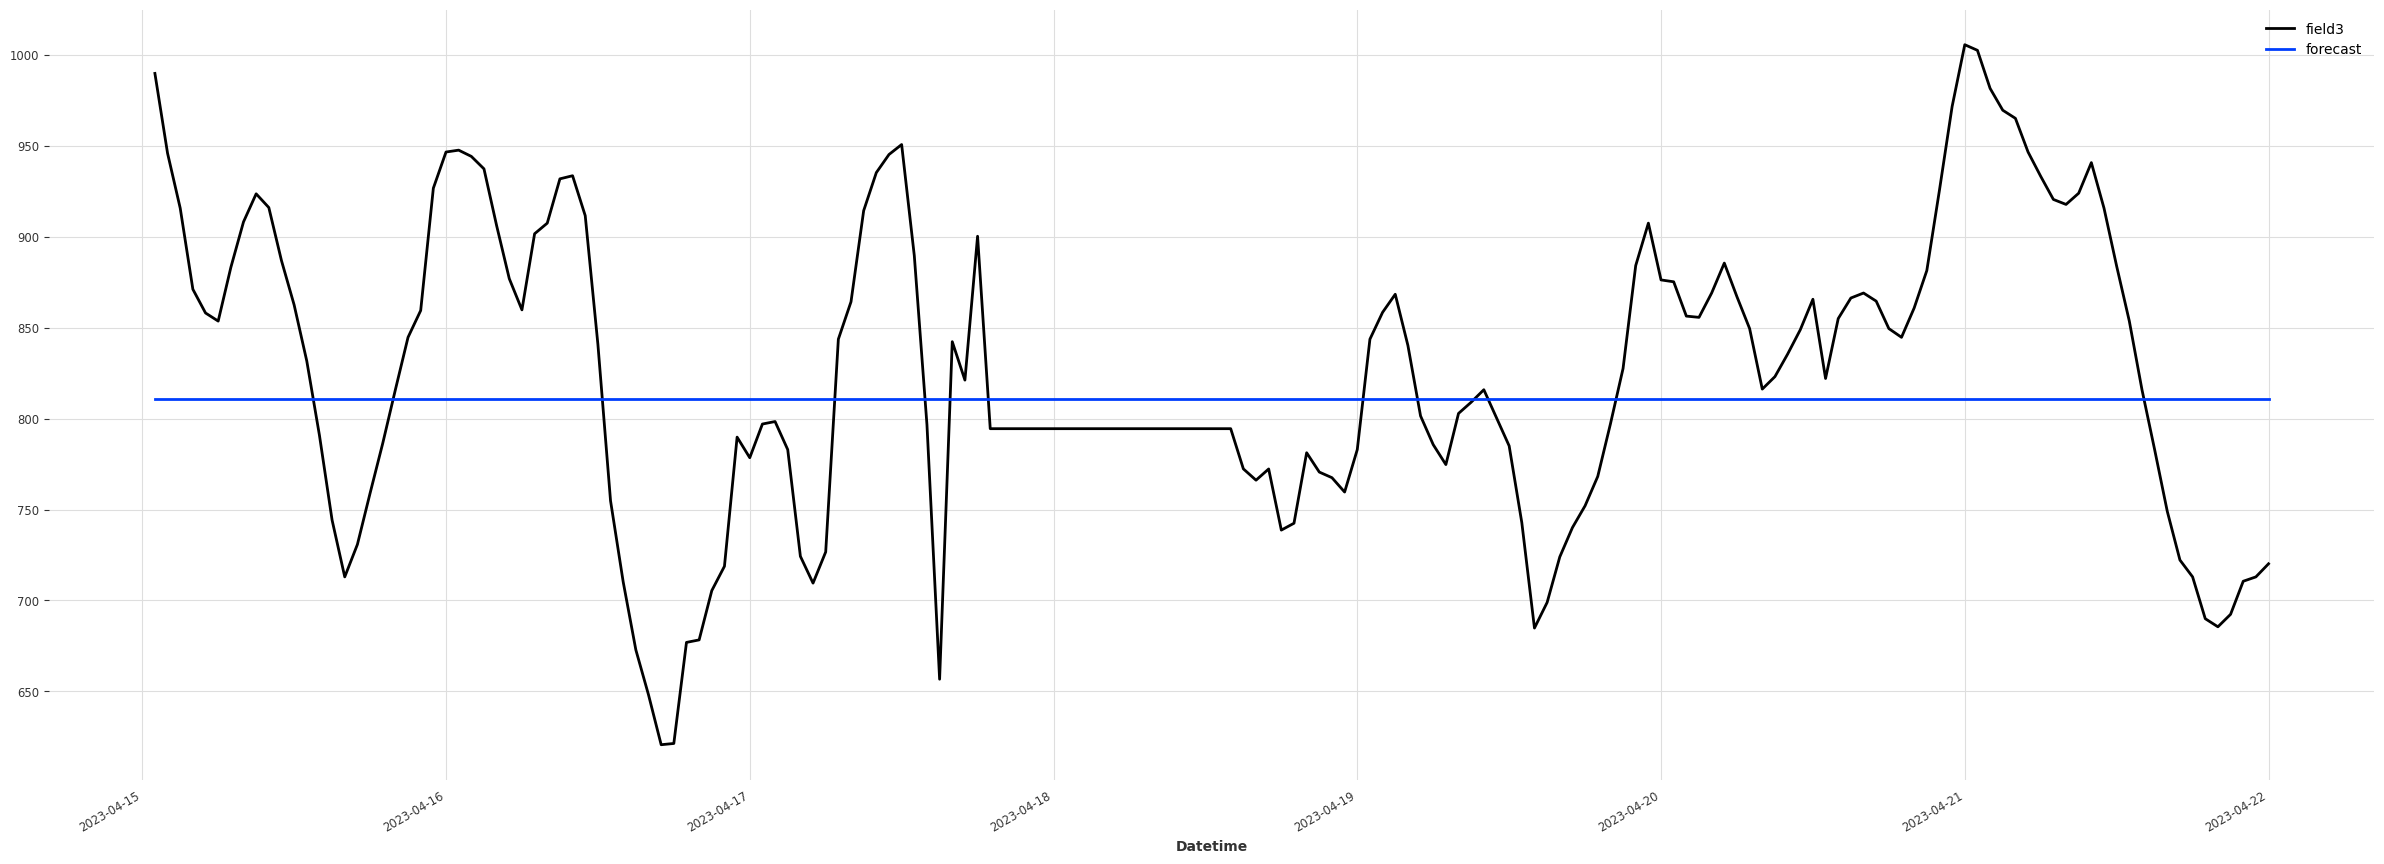

In [9]:
#mean_absolute_error(val,pred)
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
val3.plot()
croston_forecast3.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

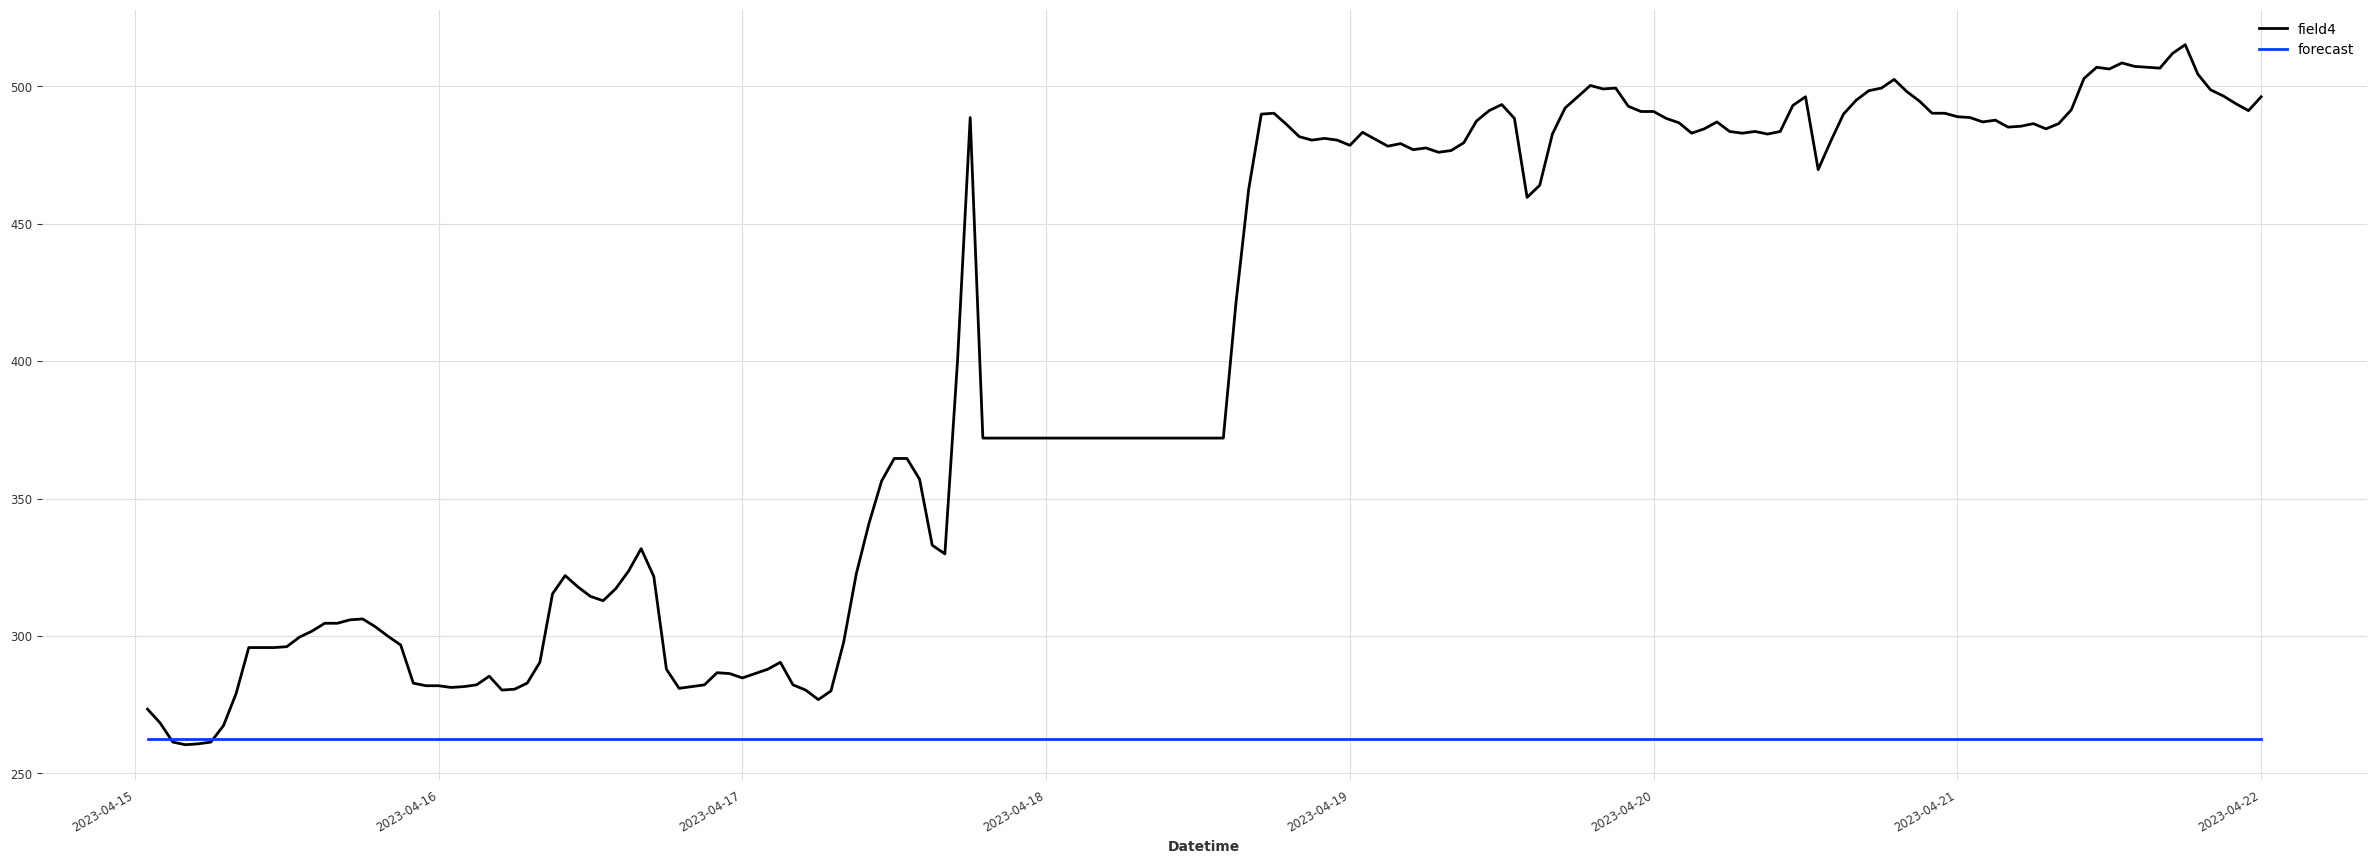

In [10]:
#mean_absolute_error(val,pred)
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
val4.plot()
croston_forecast4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

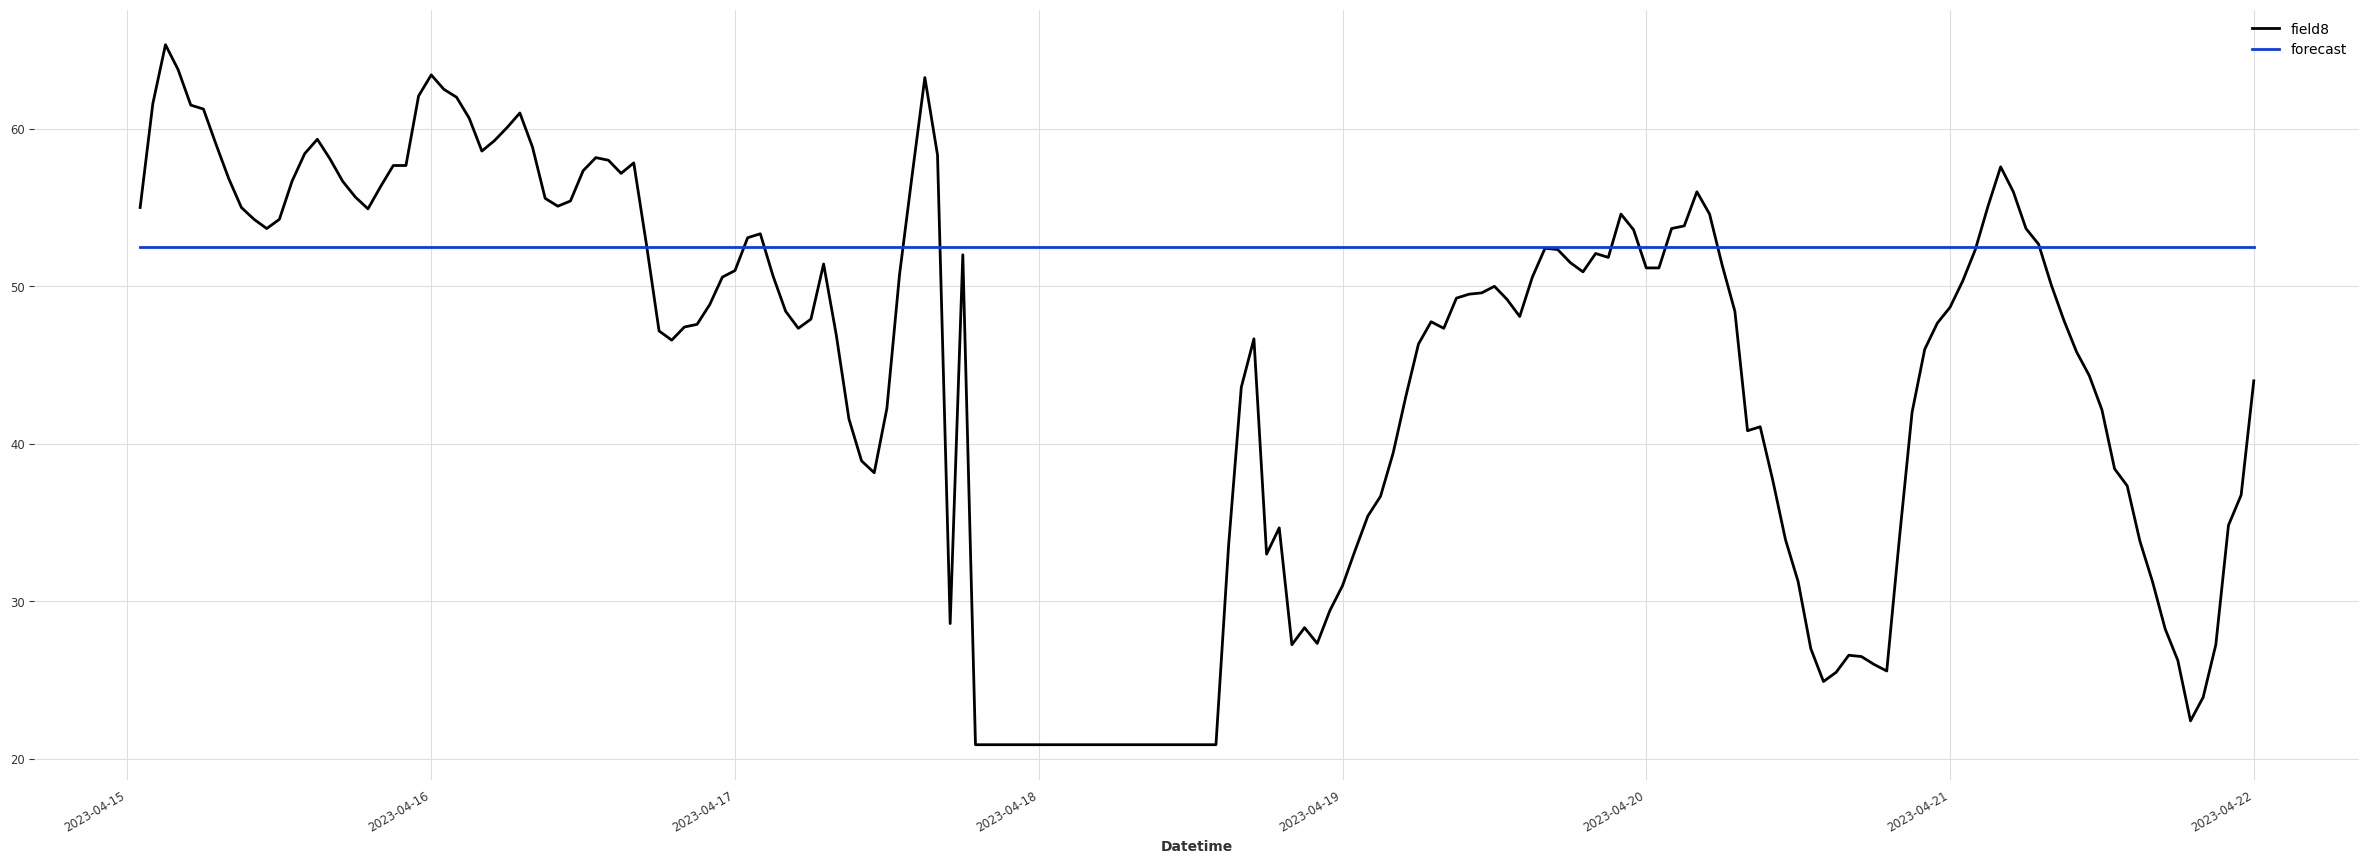

In [11]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
val8.plot()
croston_forecast8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()